## Prepare the Data for Modeling

In [1]:
import pandas as pd

df = pd.read_csv('df_clean.csv')
df = df.dropna()
df = df.drop(['yod','yoa','b_wt'], axis=1)
X = df.drop(['los','los_binary'], axis=1)
X = pd.get_dummies(X)
y = df['los_binary']

C:\Users\sonou\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Split the data to train and test data



In [2]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

## Imbalanced Dataset

We explore the target variable to see how unbalanced the data is.  It can be seen that the data is severely unbalanced. Thus, the data is imbalanced. 


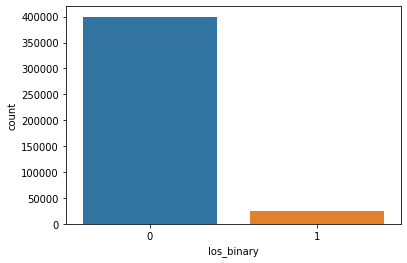

In [3]:
import seaborn as sns

ax = sns.countplot(y_train)

## Model on Imbalanced Data

We investigate how well models perform on imbalanced data. 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create a decision tree and train
model = LogisticRegression()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
#     d = pd.DataFrame({'Model':['Decision Tree','Decision Tree','Decision Tree','Decision Tree'],
#                     'Metrics':['Sensitivity','Specificity','Balanced Accuracy','Accuracy'],
#                      'Values':[tp/(tp+fn), tn/(tn+fp), .5*(tp/(tp+fn) + tn/(tn+fp)), (tp+tn)/(tp+tn+fp+fn)]})
    
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

C:\Users\sonou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy: 0.940822276236438


,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,LogisticRegression(),0.056847,0.99652,0.526683,0.940589


Comments on the results here. 

## Balance the data

Since models suffered greatly with imbalanced data.  We need to balance the data to improve model performances. An easy way to balance the data is Random Undersampling (RUS), which is randomly remove observations so that the two classes are balanced. 

In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)


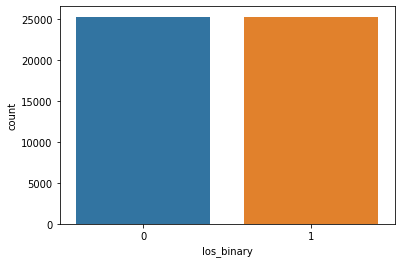

In [6]:
import seaborn as sns

ax = sns.countplot(y_train)

## Rerun models on balanced data

In [7]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
#     d = pd.DataFrame({'Model':['Decision Tree','Decision Tree','Decision Tree','Decision Tree'],
#                     'Metrics':['Sensitivity','Specificity','Balanced Accuracy','Accuracy'],
#                      'Values':[tp/(tp+fn), tn/(tn+fp), .5*(tp/(tp+fn) + tn/(tn+fp)), (tp+tn)/(tp+tn+fp+fn)]})
    
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

C:\Users\sonou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,LogisticRegression(),0.709243,0.779592,0.744417,0.775405


Comment on the result here. 